## Purpose

This project uses **linear regression** to predict the **fuel efficiency** (miles per gallon, MPG) of cars based on various features like **engine size**, **weight**, and **horsepower**. The goal is to model the relationship between these attributes and fuel efficiency using supervised machine learning.

## Dataset
* Source
    * UCI Machine Learning Repository: Auto MPG Dataset
    * URL used in code: http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

## Features

* mpg: Miles per gallon (target variable)
* cylinders: Number of cylinders
* displacement: Engine displacement (in cubic inches)
* horsepower: Engine horsepower
* weight: Vehicle weight
* acceleration: Time to accelerate from 0 to 60 mph
* model_year: Model year (e.g., 70 for 1970)
* origin: Origin of car (1: USA, 2: Europe, 3: Asia)
* car_name: Car model (not used for modeling)

## Data Preprocessing

* Missing values (especially in horsepower) are removed.
* car_name is dropped as it’s not a numerical feature useful for regression.

## Import Libraries

Standard libraries for data manipulation, visualization, modeling, and evaluation.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## Load and Clean the Dataset

* Load the dataset with proper column names.
* Replace ? in the data with NaN and drop missing rows.
* Remove the non-numeric column car_name.

In [7]:
# Load dataset

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv("Dataset/auto-mpg.data", names=column_names, sep=r'\s+', na_values='?')

# Show the first few rows
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [9]:
# Drop missing values and car_name
data.dropna(inplace=True)
data.drop('car_name', axis=1, inplace=True)

## Feature Selection

* Define input features (X) as all columns except mpg.
* Define target variable (y) as the mpg column.

In [11]:
# Features and target
X = data.drop('mpg', axis=1)
y = data['mpg']

## Train-Test Split

* Split the dataset: 80% for training and 20% for testing.

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model Training

* Use Linear Regression from scikit-learn to fit the model on training data.

In [13]:
# Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

* Predict mpg values on test data.
* Print:
    * R² Score: Measures how well the model explains the variability.
    * Mean Squared Error (MSE): Measures prediction error.

In [14]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.8363664681024054
MSE: 10.170693695667042


## Visualization

* Scatter plot showing actual vs. predicted MPG values to visualize performance.

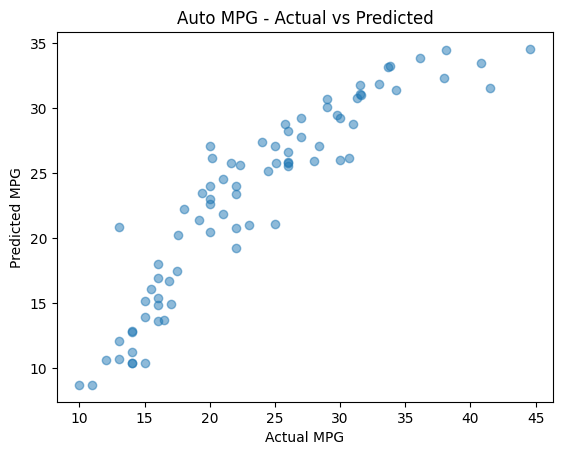

In [15]:
# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Auto MPG - Actual vs Predicted")
plt.show()